In [28]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt #used for plots

In [5]:
# Read Data
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
trainingSet = pd.read_pickle("../data/SmoteData")
testSet = pd.read_pickle("../data/IterImput_Test")
trainingSet.head()

,Treatment,Fever,Duration_of_pain,Sick_leave,Earlier_hospitalization,Familiy_history,Depression,Extremely_nervous,Stress,Irrational_thoughts_risk_lasting,Irrational_thoughts_work,Coping_strategy,Kinesiophobia_physical_exercise,Kinesiophobia_pain_stop,Age,Uses_analgesics,Uses_corticosteroids,Serious_disease,Neurogenic_signals,Continuous_pain,Decreased_mobility,Nocturnal_pain,Weightloss_per_year,Loss_muscle_strength,Failure_symptoms,Incoordination,neck_pain_intensity,low_back_pain_intensity,arm_left_pain_intensity,arm_right_pain_intensity,leg_left_pain_intensity,leg_right_pain_intensity,Paidwork
0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,6.0,9.000000,5.0,7.0,8.0,5.0,1.0,0.0,0.0,1.0,1.0,49.0,1.0,4.000000,0.0,1.0,0.000000,0.0,8.0,0.0,0.0,0.0,8.0,0.0
1,1.0,0.0,10.0,1.0,1.0,0.0,0.0,5.0,1.0,4.0,6.709114,8.0,9.0,9.0,8.0,1.0,0.0,0.0,1.0,1.0,36.0,1.0,2.635424,1.0,1.0,1.000000,0.0,6.0,0.0,0.0,0.0,8.0,0.0
2,1.0,0.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,10.000000,0.0,10.0,10.0,4.0,0.0,0.0,0.0,0.0,1.0,68.0,1.0,4.000000,0.0,1.0,0.047652,0.0,10.0,0.0,0.0,9.0,9.0,1.0
3,1.0,0.0,10.0,0.0,1.0,0.0,0.0,8.0,1.0,8.0,6.000000,7.0,8.0,8.0,6.0,0.0,0.0,0.0,1.0,1.0,53.0,0.0,2.000000,1.0,1.0,1.000000,0.0,6.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,10.0,0.0,1.0,0.0,0.0,0.0,1.0,10.0,0.000000,3.0,10.0,10.0,5.0,0.0,0.0,1.0,1.0,1.0,40.0,1.0,3.000000,0.0,1.0,1.000000,0.0,8.0,0.0,0.0,6.0,3.0,0.0


In [22]:
X = trainingSet.loc[:,trainingSet.columns != 'Treatment']
Y = trainingSet.loc[:,'Treatment'].astype(int)

X_test = testSet.loc[:,testSet.columns != 'Treatment']
Y_test = testSet.loc[:,'Treatment'].astype(int)

X.shape

(1200, 32)

In [18]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=32, activation='relu'))
	model.add(Dense(4, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [26]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)
trainingHistory = estimator.fit(X, Y, validation_split=0.1)
trainingHistory

In [19]:
kfold = KFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: 38.92% (4.57%)


              precision    recall  f1-score   support

           1       0.45      0.78      0.57       128
           2       0.41      0.47      0.44        30
           3       0.14      0.62      0.23         8
           5       0.53      0.06      0.11       141

    accuracy                           0.42       307
   macro avg       0.38      0.48      0.34       307
weighted avg       0.48      0.42      0.34       307



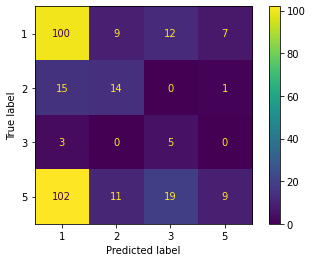

In [29]:
predictions = estimator.predict(X_test)
print(classification_report(Y_test,predictions))

ConfusionMatrixDisplay.from_predictions(Y_test,predictions)
plt.show()